# Importing The Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Dataset Information:")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")
print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {np.bincount(y)}")

Dataset Information:
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 4)
Class distribution: [50 50 50]


# Exploratory Data Analysis

In [3]:
def plot_dataset_analysis(X, y, feature_names, target_names):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Feature distributions
    for i in range(4):
        ax = axes[0, i] if i < 3 else axes[1, 0]
        for class_idx in range(3):
            ax.hist(X[y == class_idx, i], alpha=0.7, label=target_names[class_idx])
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.set_title(f'Distribution of {feature_names[i]}')
    
    # Correlation heatmap
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y
    corr_matrix = df.corr()
    ax = axes[1, 1]
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
    ax.set_title('Feature Correlation Matrix')
    
    # Class distribution
    ax = axes[1, 2]
    class_counts = np.bincount(y)
    ax.bar(target_names, class_counts, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax.set_ylabel('Count')
    ax.set_title('Class Distribution')
    
    plt.tight_layout()
    plt.show()

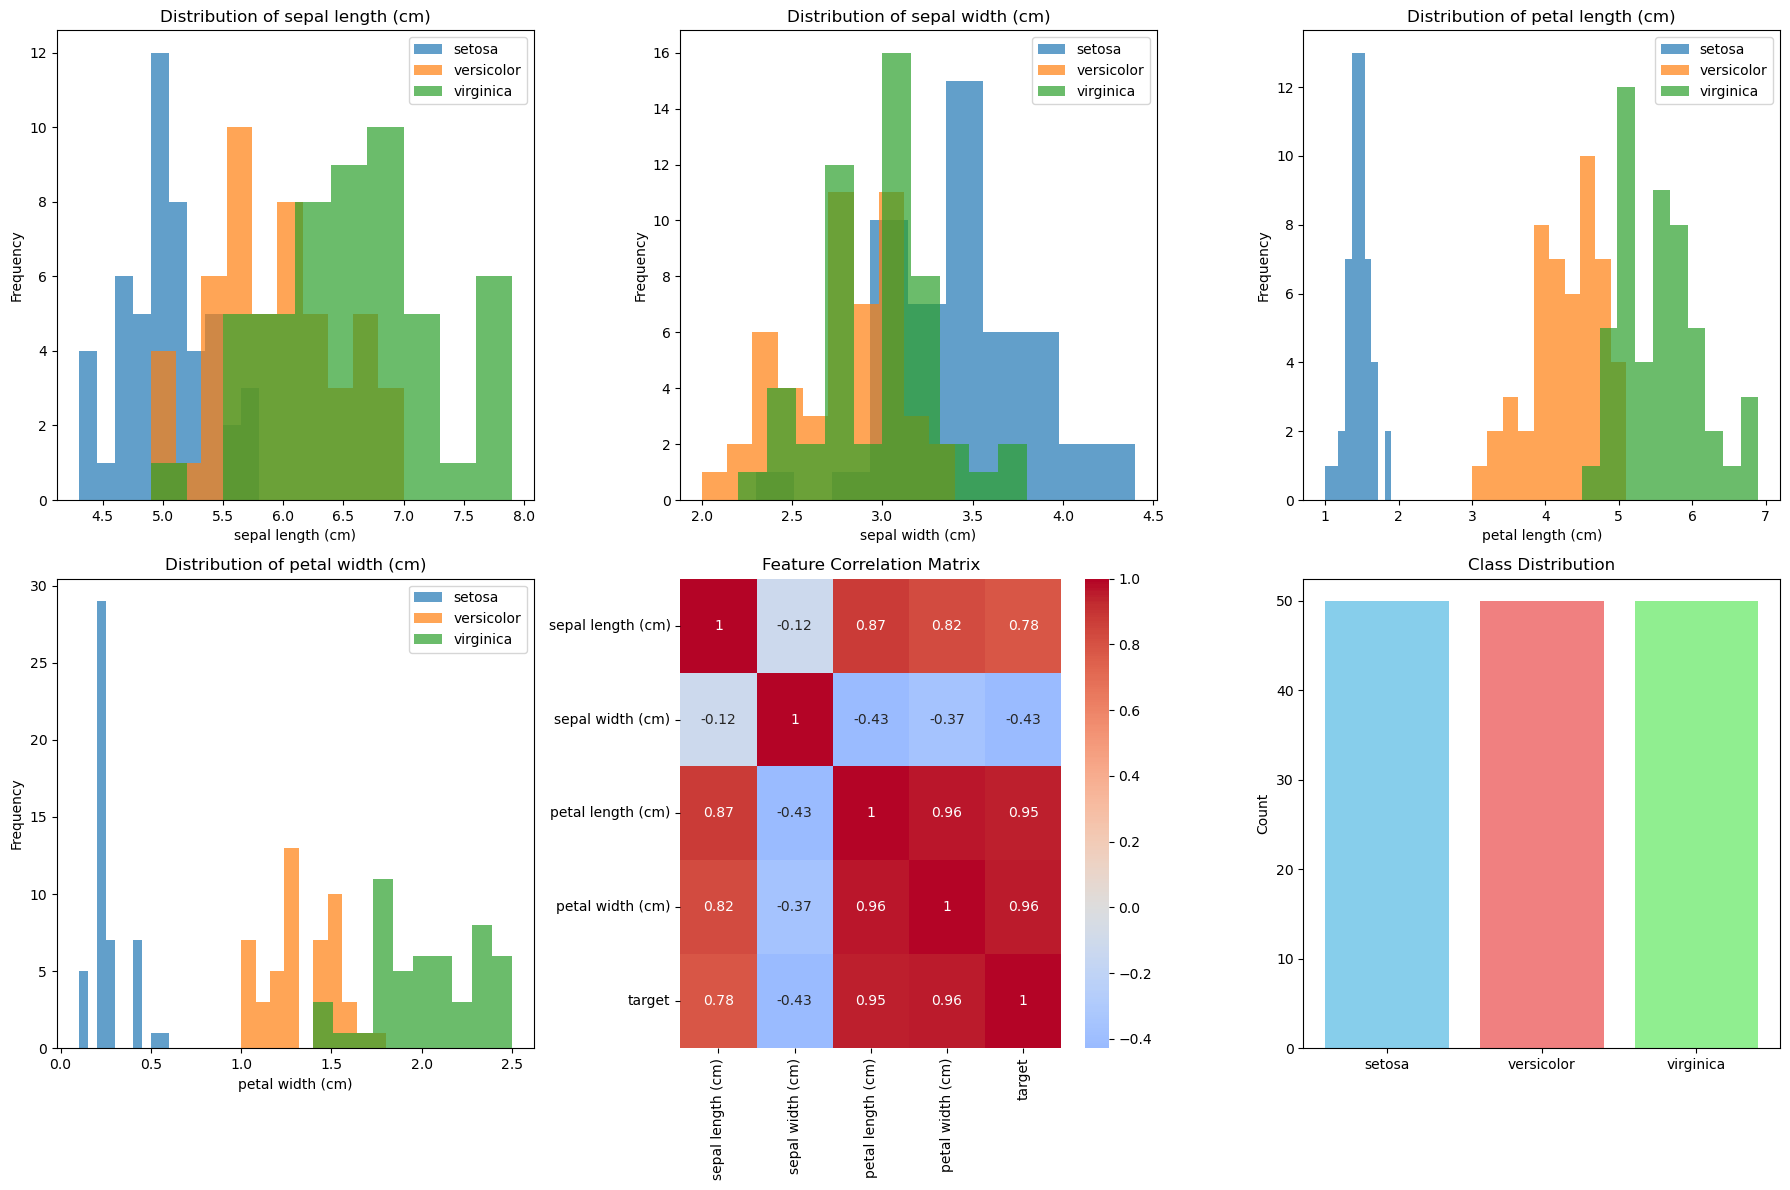

In [4]:
plot_dataset_analysis(X, y, feature_names, target_names)

# Dimensionality Reduction and Visualization

In [5]:
def plot_dimension_reduction(X, y, target_names):
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))
    
    # PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)
    
    scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
    axes[0].set_xlabel('PC1 ({:.2f}% variance)'.format(pca.explained_variance_ratio_[0]*100))
    axes[0].set_ylabel('PC2 ({:.2f}% variance)'.format(pca.explained_variance_ratio_[1]*100))
    axes[0].set_title('PCA - Iris Dataset')
    legend1 = axes[0].legend(scatter1.legend_elements()[0], target_names, title="Classes")
    axes[0].add_artist(legend1)
    
    # t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(X)
    
    scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
    axes[1].set_xlabel('t-SNE Component 1')
    axes[1].set_ylabel('t-SNE Component 2')
    axes[1].set_title('t-SNE - Iris Dataset')
    legend2 = axes[1].legend(scatter2.legend_elements()[0], target_names, title="Classes")
    axes[1].add_artist(legend2)
    
    return X_pca

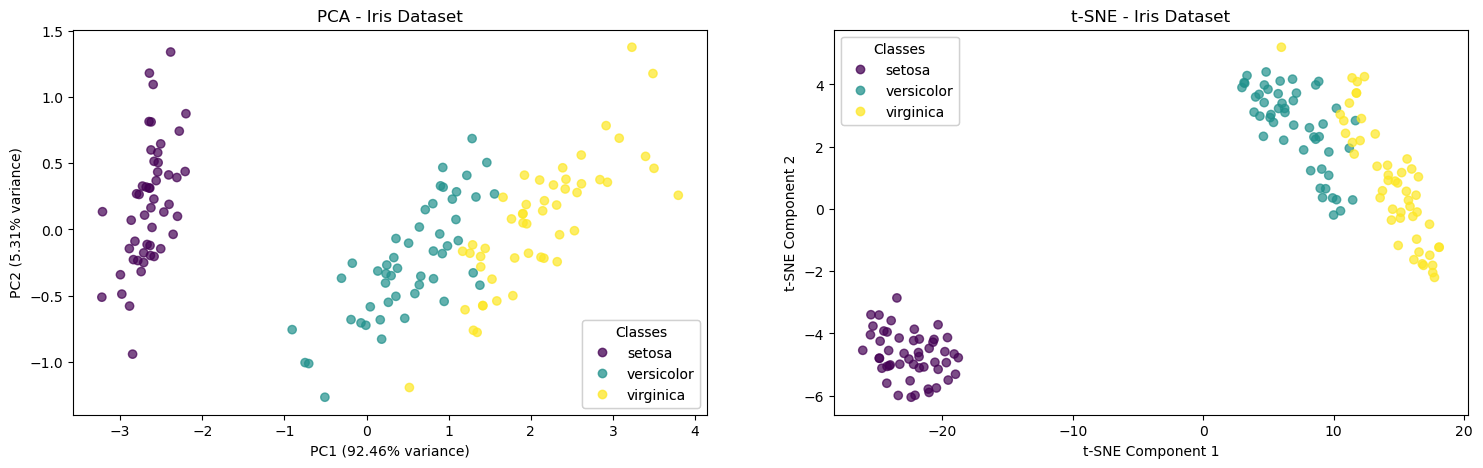

In [6]:
X_pca = plot_dimension_reduction(X, y, target_names)

# Default Perceptron Training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Without standardization
perceptron_default = Perceptron(random_state=42)
perceptron_default.fit(X_train, y_train)
y_pred_default = perceptron_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

# With standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

perceptron_std = Perceptron(random_state=42)
perceptron_std.fit(X_train_std, y_train)
y_pred_std = perceptron_std.predict(X_test_std)
accuracy_std = accuracy_score(y_test, y_pred_std)

print(f"Default Perceptron (Without Standardization)")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Number of iterations: {perceptron_default.n_iter_}")
print(f"Number of features: {perceptron_default.n_features_in_}")

print(f"\n\nDefault Perceptron (With Standardization)")
print(f"Accuracy: {accuracy_std:.4f}")
print(f"Number of iterations: {perceptron_std.n_iter_}")
print(f"Number of features: {perceptron_std.n_features_in_}")

Default Perceptron (Without Standardization)
Accuracy: 0.6667
Number of iterations: 15
Number of features: 4


Default Perceptron (With Standardization)
Accuracy: 0.8000
Number of iterations: 13
Number of features: 4


# Impact of Number of Epochs (max_iter)

In [8]:
max_iters = [5, 10, 50, 100, 500, 1000]
results_epochs = []
results_epochs_std = []

print("Without Standardization")
for max_iter in max_iters:
    perceptron = Perceptron(max_iter=max_iter, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_epochs.append({
        'max_iter': max_iter,
        'accuracy': accuracy,
        'iterations': perceptron.n_iter_,
        'converged': perceptron.n_iter_ < max_iter
    })
    print(f"max_iter={max_iter:4d} | Accuracy: {accuracy:.4f} | "
          f"Iterations: {perceptron.n_iter_:3d} | Converged: {perceptron.n_iter_ < max_iter}")
    
print("\n\n\nWith Standardization")
for max_iter in max_iters:
    perceptron_std = Perceptron(max_iter=max_iter, random_state=42)
    perceptron_std.fit(X_train_std, y_train)
    y_pred_std = perceptron_std.predict(X_test_std)
    accuracy_std = accuracy_score(y_test, y_pred_std)
    results_epochs_std.append({
        'max_iter': max_iter,
        'accuracy': accuracy_std,
        'iterations': perceptron_std.n_iter_,
        'converged': perceptron_std.n_iter_ < max_iter
    })
    print(f"max_iter={max_iter:4d} | Accuracy: {accuracy_std:.4f} | "
          f"Iterations: {perceptron_std.n_iter_:3d} | Converged: {perceptron_std.n_iter_ < max_iter}")

Without Standardization
max_iter=   5 | Accuracy: 0.3778 | Iterations:   5 | Converged: False
max_iter=  10 | Accuracy: 0.6667 | Iterations:  10 | Converged: False
max_iter=  50 | Accuracy: 0.6667 | Iterations:  15 | Converged: True
max_iter= 100 | Accuracy: 0.6667 | Iterations:  15 | Converged: True
max_iter= 500 | Accuracy: 0.6667 | Iterations:  15 | Converged: True
max_iter=1000 | Accuracy: 0.6667 | Iterations:  15 | Converged: True



With Standardization
max_iter=   5 | Accuracy: 0.8667 | Iterations:   5 | Converged: False
max_iter=  10 | Accuracy: 0.8000 | Iterations:  10 | Converged: False
max_iter=  50 | Accuracy: 0.8000 | Iterations:  13 | Converged: True
max_iter= 100 | Accuracy: 0.8000 | Iterations:  13 | Converged: True
max_iter= 500 | Accuracy: 0.8000 | Iterations:  13 | Converged: True
max_iter=1000 | Accuracy: 0.8000 | Iterations:  13 | Converged: True


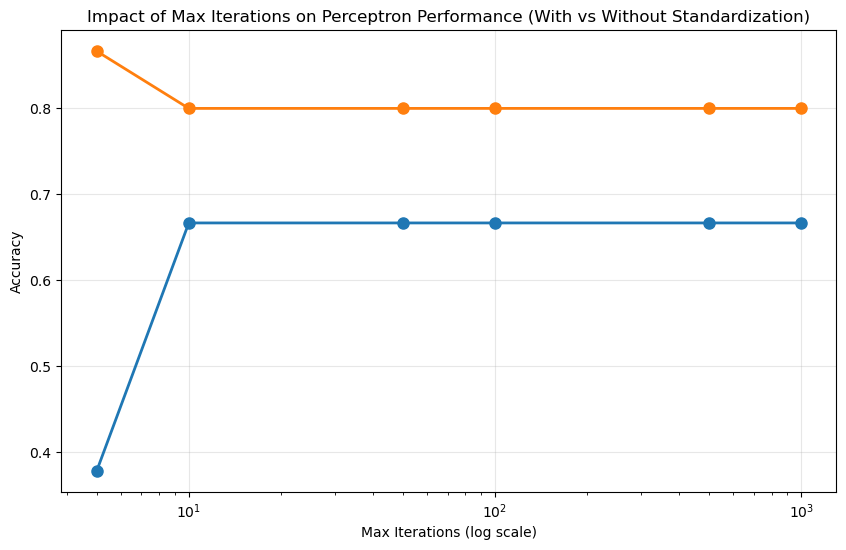

In [9]:
plt.figure(figsize=(10, 6))
plt.plot([r['max_iter'] for r in results_epochs], 
         [r['accuracy'] for r in results_epochs], marker='o', linewidth=2, markersize=8)
plt.plot([r['max_iter'] for r in results_epochs_std],
         [r['accuracy'] for r in results_epochs_std], marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Max Iterations (log scale)')
plt.ylabel('Accuracy')
plt.title('Impact of Max Iterations on Perceptron Performance (With vs Without Standardization)')
plt.grid(True, alpha=0.3)
plt.show()

# Impact of Learning Rate (eta0)

In [10]:
learning_rates = [1, 0.1, 0.01, 0.001]
results_lr = []
results_lr_std = []
print("Without Standardization")
for eta0 in learning_rates:
    perceptron = Perceptron(eta0=eta0, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_lr.append({
        'eta0': eta0,
        'accuracy': accuracy,
        'iterations': perceptron.n_iter_,
        'converged': perceptron.n_iter_ < 1000
    })
    print(f"eta0={eta0:6.3f} | Accuracy: {accuracy:.4f} | "
          f"Iterations: {perceptron.n_iter_:3d} | Converged: {perceptron.n_iter_ < 1000}")
    
print("\n\nWith Standardization")
for eta0 in learning_rates:
    perceptron_std = Perceptron(eta0=eta0, random_state=42)
    perceptron_std.fit(X_train_std, y_train)
    y_pred_std = perceptron.predict(X_test_std)
    accuracy_std = accuracy_score(y_test, y_pred_std)
    results_lr_std.append({
        'eta0': eta0,
        'accuracy': accuracy_std,
        'iterations': perceptron_std.n_iter_,
        'converged': perceptron_std.n_iter_ < 1000
    })
    print(f"eta0={eta0:6.3f} | Accuracy: {accuracy_std:.4f} | "
          f"Iterations: {perceptron_std.n_iter_:3d} | Converged: {perceptron_std.n_iter_ < 1000}")

Without Standardization
eta0= 1.000 | Accuracy: 0.6667 | Iterations:  15 | Converged: True
eta0= 0.100 | Accuracy: 0.6667 | Iterations:  13 | Converged: True
eta0= 0.010 | Accuracy: 0.6667 | Iterations:  13 | Converged: True
eta0= 0.001 | Accuracy: 0.6667 | Iterations:   8 | Converged: True


With Standardization
eta0= 1.000 | Accuracy: 0.8444 | Iterations:  13 | Converged: True
eta0= 0.100 | Accuracy: 0.8444 | Iterations:  13 | Converged: True
eta0= 0.010 | Accuracy: 0.8444 | Iterations:   6 | Converged: True
eta0= 0.001 | Accuracy: 0.8444 | Iterations:   6 | Converged: True


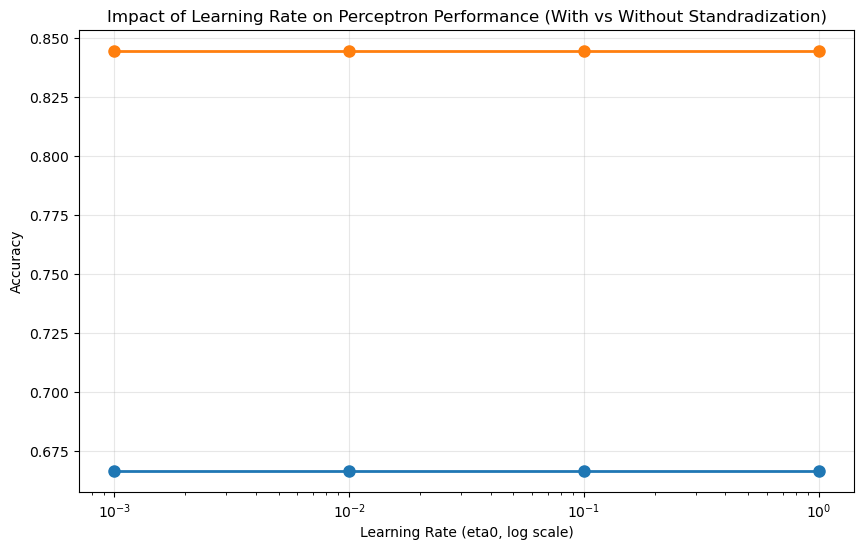

In [11]:
plt.figure(figsize=(10, 6))
plt.plot([r['eta0'] for r in results_lr], 
         [r['accuracy'] for r in results_lr], marker='o', linewidth=2, markersize=8)
plt.plot([r['eta0'] for r in results_lr_std],
         [r['accuracy'] for r in results_lr_std], marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Learning Rate (eta0, log scale)')
plt.ylabel('Accuracy')
plt.title('Impact of Learning Rate on Perceptron Performance (With vs Without Standradization)')
plt.grid(True, alpha=0.3)
plt.show()

# Impact of Standardization

In [12]:
# Without standardization
perceptron_no_std = Perceptron(random_state=42)
perceptron_no_std.fit(X_train, y_train)
y_pred_no_std = perceptron_no_std.predict(X_test)
accuracy_no_std = accuracy_score(y_test, y_pred_no_std)

# With standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

perceptron_std = Perceptron(random_state=42)
perceptron_std.fit(X_train_std, y_train)
y_pred_std = perceptron_std.predict(X_test_std)
accuracy_std = accuracy_score(y_test, y_pred_std)

print(f"Without Standardization: Accuracy = {accuracy_no_std:.4f}, Iterations = {perceptron_no_std.n_iter_}")
print(f"With Standardization:    Accuracy = {accuracy_std:.4f}, Iterations = {perceptron_std.n_iter_}")

# Compare feature statistics
print("\nFeature Statistics Comparison:")
print("Original - Mean:", X_train.mean(axis=0), "Std:", X_train.std(axis=0))
print("Standardized - Mean:", X_train_std.mean(axis=0), "Std:", X_train_std.std(axis=0))

Without Standardization: Accuracy = 0.6667, Iterations = 15
With Standardization:    Accuracy = 0.8000, Iterations = 13

Feature Statistics Comparison:
Original - Mean: [5.87333333 3.0552381  3.7847619  1.20571429] Std: [0.85882164 0.45502087 1.77553646 0.77383751]
Standardized - Mean: [ 2.38327876e-15 -1.12145742e-15 -1.37456184e-16 -6.97854473e-17] Std: [1. 1. 1. 1.]


# Decision Boundary in 2D PCA space

In [13]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y)

perceptron_pca = Perceptron(random_state=42)
perceptron_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = perceptron_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

print("\n\nPerceptron on PCA-reduced data")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Number of iterations: {perceptron_pca.n_iter_}")
print(f"Number of features: {perceptron_pca.n_features_in_}")



Perceptron on PCA-reduced data
Accuracy: 0.8889
Number of iterations: 12
Number of features: 2


# Plotting Decision Boundaries

In [14]:
def plot_decision_boundaries(X, y, model, target_names, title):
    plt.figure(figsize=(10, 8))

    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
                         edgecolors='black', s=50)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)

    handles, _ = scatter.legend_elements()
    plt.legend(handles=handles, labels=list(target_names), title="Classes")

    plt.colorbar(scatter)
    plt.show()

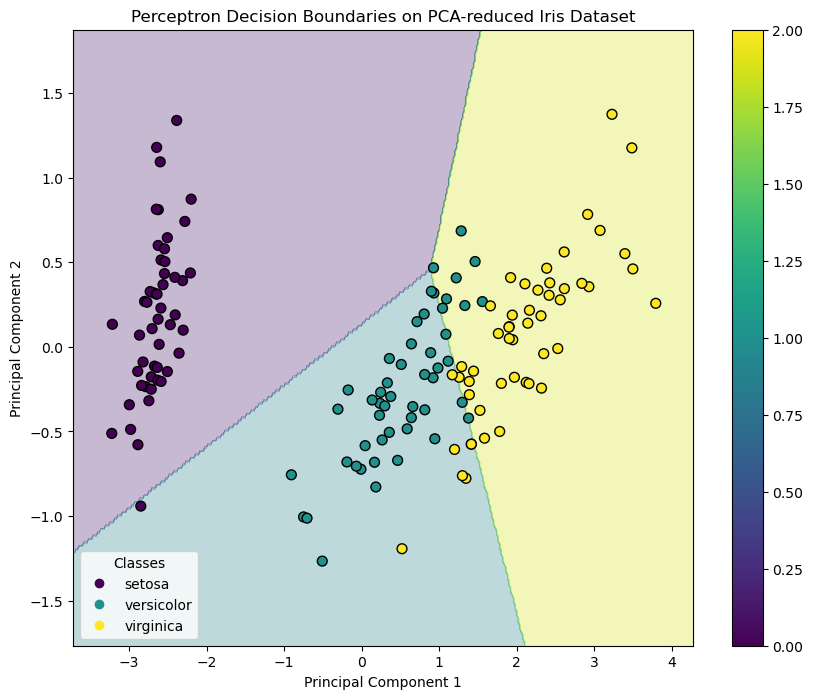

In [15]:
plot_decision_boundaries(X_pca, y, perceptron_pca, target_names,
                        "Perceptron Decision Boundaries on PCA-reduced Iris Dataset")